In [16]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
import pandas as pd
import numpy as np
import glob,os
#from tqdm.auto import tqdm
import math
import sklearn
from sklearn.linear_model import LinearRegression

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite.models import Models, Prediction
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

In [17]:
def select_links(tau_min, tau_max, parents, children):
    """
    This function selects the causal links that will be tested by
    PCMCI. The links are selected such that per each variable in
    `children` all `parents` are stablished as causes, and no other
    causal relationships exist.
    
    Assumes `parents` and `children` are disjoint sets, and that all
    variables are included in the union of both sets.
    
    Parameters
    ----------
    tau_min : int
        Minimum time lag to test. Note that zero-lags are undirected.
    tau_max : int
        Maximum time lag. Must be larger or equal to tau_min.
    parents : set of int
        List of variables that will be assigned as a parent link.
        Assumed to be disjoint with children
    children : set of int
        List of variables that will be assigned a link from a parent.
        Assumed to be disjoint with parents
    Returns
    -------
    selected_links: dict
        Dictionary of selected links for Tigramite
        
    """

    parents = set(parents)
    children = set(children)

    selected_links = dict()
    # Set the default as all combinations of the selected variables
    for var in [*children, *parents]:
        if var in children:
            # Children can be caused only by parents and by themselves
            selected_links[var] = [
                (parent, -lag)
                for parent in parents
                for lag in range(tau_min, tau_max + 1)
            ]
        else:
            selected_links[var] = []

    return selected_links

def _process_dataset(path=None):
    df1 = pd.read_csv(path,sep=',')
    df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    df1=df1.drop('a', axis=1)
    df1=df1.drop('conv_rrate', axis=1)
    df1=df1.drop('ls_rrate', axis=1)
    df1=df1.drop('mn_conv_prate', axis=1)
    df1=df1.drop('mn_ls_prate', axis=1)
    df1=df1.drop('mn_tot_prate', axis=1)
    df1=df1.drop('outconv_rrate', axis=1)
    df1=df1.drop('outls_rrate', axis=1)
    df1=df1.drop('outmn_conv_prate', axis=1)
    df1=df1.drop('outmn_ls_prate', axis=1)
    df1=df1.drop('outmn_tot_prate', axis=1)
    df1=df1.drop('conv_ppt', axis=1)
    df1=df1.drop('outconv_ppt', axis=1)
    
    TCname = path.split('/')[-1].split('.')[0].split('_')[-1]
    #print(TCname)
    for item in glob.glob('/media/saranya/DAEA17D6EA17ADAF/Data/Research_2022/jun22/targets/*tot_ppt_int*'):
        if str(TCname) in item:
            d1=pd.read_csv(item)
            d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
            d1=d1.drop('a', axis=1)
            dt1=pd.concat([d1,df1],axis=1, join='inner')
        else:
            continue
    return dt1

In [18]:
p1="../../tigramite_timeseries/"
p2="../../targets/"

ds1=_process_dataset(glob.glob(p1+'*vongfong*')[0])
ds2=_process_dataset(glob.glob(p1+'*chanhom*')[0])
ds3=_process_dataset(glob.glob(p1+'*saudel*')[0])
ds4=_process_dataset(glob.glob(p1+'*molave*')[0])
ds5=_process_dataset(glob.glob(p1+'*goni*')[0])
ds6=_process_dataset(glob.glob(p1+'*atsani*')[0])
ds7=_process_dataset(glob.glob(p1+'*vamco*')[0])
ds8=_process_dataset(glob.glob(p1+'*neoguri*')[0])
ds9=_process_dataset(glob.glob(p1+'*bualoi*')[0])
ds10=_process_dataset(glob.glob(p1+'*halong*')[0])
ds11=_process_dataset(glob.glob(p1+'*nakri*')[0])
ds12=_process_dataset(glob.glob(p1+'*fengshen*')[0])
ds13=_process_dataset(glob.glob(p1+'*kalmaegi*')[0])
ds14=_process_dataset(glob.glob(p1+'*fungwong*')[0])
ds15=_process_dataset(glob.glob(p1+'*kammuri*')[0])
ds16=_process_dataset(glob.glob(p1+'*jelawat*')[0])
ds17=_process_dataset(glob.glob(p1+'*maliksi*')[0])
ds18=_process_dataset(glob.glob(p1+'*kongrey*')[0])
ds19=_process_dataset(glob.glob(p1+'*yutu*')[0])
ds20=_process_dataset(glob.glob(p1+'*muifa*')[0])
ds21=_process_dataset(glob.glob(p1+'*lan*')[0])
ds22=_process_dataset(glob.glob(p1+'*damrey*')[0])
ds23=_process_dataset(glob.glob(p1+'*haikul*')[0])
ds24=_process_dataset(glob.glob(p1+'*megi*')[0])
ds25=_process_dataset(glob.glob(p1+'*sarika*')[0])
ds26=_process_dataset(glob.glob(p1+'*haimaa*')[0])
ds27=_process_dataset(glob.glob(p1+'*maysak*')[0])
ds28=_process_dataset(glob.glob(p1+'*mujigae*')[0])
ds29=_process_dataset(glob.glob(p1+'*koppu*')[0])
ds30=_process_dataset(glob.glob(p1+'*infa*')[0])
ds31=_process_dataset(glob.glob(p1+'*tapah*')[0])
ds32=_process_dataset(glob.glob(p1+'*nuri*')[0])
ds33=_process_dataset(glob.glob(p1+'*hagupit*')[0])
ds34=_process_dataset(glob.glob(p1+'*yagi*')[0])
ds35=_process_dataset(glob.glob(p1+'*fitow*')[0])
ds36=_process_dataset(glob.glob(p1+'*danas*')[0])
ds37=_process_dataset(glob.glob(p1+'*francisco*')[0])
ds38=_process_dataset(glob.glob(p1+'*krosa*')[0])
ds39=_process_dataset(glob.glob(p1+'*haiyan*')[0])
ds40=_process_dataset(glob.glob(p1+'*guchol*')[0])
ds41=_process_dataset(glob.glob(p1+'*gaemi*')[0])
ds42=_process_dataset(glob.glob(p1+'*maria*')[0])
ds43=_process_dataset(glob.glob(p1+'*sontinh*')[0])
ds44=_process_dataset(glob.glob(p1+'*bopha*')[0])
ds45=_process_dataset(glob.glob(p1+'*songda*')[0])
ds46=_process_dataset(glob.glob(p1+'*haima*')[0])
ds47=_process_dataset(glob.glob(p1+'*nalgae*')[0])
ds48=_process_dataset(glob.glob(p1+'*washi*')[0])

In [19]:
tcwp1=ds1.values
tcwp2=ds2.values
tcwp3=ds3.values
tcwp4=ds4.values
tcwp5=ds5.values
tcwp6=ds6.values
tcwp7=ds7.values
tcwp8=ds8.values
tcwp9=ds9.values
tcwp10=ds10.values
tcwp11=ds11.values
tcwp12=ds12.values
tcwp13=ds13.values
tcwp14=ds14.values
tcwp15=ds15.values
tcwp16=ds16.values
tcwp17=ds17.values
tcwp18=ds18.values
tcwp19=ds19.values
tcwp20=ds20.values
tcwp21=ds21.values
tcwp22=ds22.values
tcwp23=ds23.values
tcwp24=ds24.values
tcwp25=ds25.values
tcwp26=ds26.values
tcwp27=ds27.values
tcwp28=ds28.values
tcwp29=ds29.values
tcwp30=ds30.values
tcwp31=ds31.values
tcwp32=ds32.values
tcwp33=ds33.values
tcwp34=ds34.values
tcwp35=ds35.values
tcwp36=ds36.values
tcwp37=ds37.values
tcwp38=ds38.values
tcwp39=ds39.values
tcwp40=ds40.values
tcwp41=ds41.values
tcwp42=ds42.values
tcwp43=ds43.values
tcwp44=ds44.values
tcwp45=ds45.values
tcwp46=ds46.values
tcwp47=ds47.values
tcwp48=ds48.values

In [20]:
ddwp={'cyclone1':tcwp1,'cyclone2':tcwp2,'cyclone3':tcwp3,'cyclone4':tcwp4,'cyclone5':tcwp5,'cyclone6':tcwp6,
      'cyclone7':tcwp7, 'cyclone8':tcwp8,'cyclone9':tcwp9,'cyclone10':tcwp10,'cyclone11':tcwp11,'cyclone12':tcwp12,
      'cyclone13':tcwp13,'cyclone14':tcwp14,'cyclone15':tcwp15,'cyclone16':tcwp16,'cyclone17':tcwp17,'cyclone18':tcwp18,
      'cyclone19':tcwp19,'cyclone20':tcwp20,'cyclone21':tcwp21,'cyclone22':tcwp22,'cyclone23':tcwp23,'cyclone24':tcwp24,
      'cyclone25':tcwp25,'cyclone26':tcwp26,'cyclone27':tcwp27,'cyclone28':tcwp28,'cyclone29':tcwp29,'cyclone30':tcwp30,
      'cyclone31':tcwp31,'cyclone32':tcwp32,'cyclone33':tcwp33,'cyclone34':tcwp34,'cyclone35':tcwp35,'cyclone36':tcwp36,
      'cyclone37':tcwp37,'cyclone38':tcwp38,'cyclone39':tcwp39,'cyclone40':tcwp40,'cyclone41':tcwp41,'cyclone42':tcwp42,
      'cyclone43':tcwp43,'cyclone44':tcwp44,'cyclone45':tcwp45,'cyclone46':tcwp46,'cyclone47':tcwp47,'cyclone48':tcwp48}

In [6]:
var_names=ds1.columns.values.tolist()

#### Create PCMCI objects

In [22]:
class Pipeline:
    """
    Tigramite and Linear Regression Pipeline
    """
    def __init__(self,data=None,pc_alpha=None,alpha_level=None,pc_type='run_pcstable' or 'pcmci',tau_min0=None,tau_max0=None,
                 target='precip',var_name=None,seed=None,cond_ind_test=ParCorr()):
        self.pc_alpha = pc_alpha
        self.alpha_level = alpha_level
        self.data = data
        self.pc_type = pc_type
        self.target = target
        self.tau_min0 = tau_min0
        self.tau_max0 = tau_max0
        self.var_name = var_name
        self.seed = seed
        self.cond_ind_test = cond_ind_test
        
    #################################################################################
    # Step 0: Split
    #################################################################################
    def splitdata(self,testindex=None):
        datae = self.data.copy()
        traindata = {}
        testdata = {}
        validdata = {}
        validindex,newtestindex = testindex[:int(len(testindex)/2)],testindex[int(len(testindex)/2):]
        for obj in datae.keys():
            number = int(obj[7:])
            if number in list(newtestindex):
                testdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
            elif number in list(validindex):
                validdata['cyclone'+str(number)] = datae['cyclone'+str(number)]
            else:
                traindata['cyclone'+str(number)] = datae['cyclone'+str(number)]
        return traindata,validdata,testdata
    
    #################################################################################
    # Step 1: Tigramite
    #################################################################################
    def run_tigramite(self,lengthtrain=None):
        #assert len(self.data)==lengthtrain,"Wrong shape!"
        datae = self.data.copy()
        dataframe =  pp.DataFrame(datae,analysis_mode ='multiple', var_names=var_names)
        #################################################################################
        # Sel links
        #################################################################################
        for member in dataframe.values.keys():
            children = [0,1,2]
            parents = np.arange(3,259)
            sel_links = select_links(self.tau_min0, self.tau_max0, parents, children)
        #################################################################################
        # Run Tigramite
        #################################################################################        
        pcmci = PCMCI(dataframe = dataframe, cond_ind_test = self.cond_ind_test)
        if self.pc_type=='run_pcstable':
            results = pcmci.run_pc_stable(selected_links=sel_links, tau_min=self.tau_min0, tau_max=self.tau_max0,\
                                          pc_alpha=self.pc_alpha)
        elif self.pc_type=='pcmci':
            results = pcmci.run_pcmci(selected_links=sel_links, tau_min=self.tau_min0, tau_max=self.tau_max0,\
                                      pc_alpha=self.pc_alpha,alpha_level=self.alpha_level)

        pcmci.verbosity = 2
        #################################################################################
        # Test
        #################################################################################   
        #pcmci.print_results(results,self.alpha_level)
        #pcmci.print_significant_links(p_matrix=results['p_matrix'],
        #val_matrix = results['val_matrix'],
        #alpha_level = self.alpha_level)
        return results
    
    #################################################################################
    # Step 2: Linear Regression
    #################################################################################
    # Helper functions
    #################################################################################
    def random_testindex(self,totalexp=None,testexp=None):
        from numpy.random import default_rng
        rng = default_rng(self.seed)
        seed = rng.choice(totalexp, testexp, replace=False)
        return seed
    
    def extract_lag_info(self,datar=None,varindex=None,lag=None):
        temp = datar[:,varindex] # Full time series
        store = []
        for timeindex in range(len(temp)):
            if timeindex < np.abs(lag):
                store.append(np.nan)
            elif timeindex > len(temp)-1-np.abs(lag):
                store.append(np.nan)
            else:
                store.append(temp[timeindex-np.abs(lag)])
        return store
    
    def extract_var_and_lag(self,pcmci_results=None,p_or_q='p' or 'q'):
        datae = self.data.copy()
        dataframe =  pp.DataFrame(datae,analysis_mode ='multiple', var_names=var_names)
        pcmci = PCMCI(dataframe = dataframe, cond_ind_test = self.cond_ind_test)
        #################################################################################
        # Sel links
        #################################################################################
        for member in dataframe.values.keys():
            children = [0,1,2]
            parents = np.arange(3,259)
            sel_links = select_links(self.tau_min0, self.tau_max0, parents, children)
        
        q_matrix = pcmci.get_corrected_pvalues(p_matrix=pcmci_results['p_matrix'],
                                               selected_links = sel_links, 
                                               tau_min=self.tau_min0,tau_max=self.tau_max0, fdr_method='fdr_bh')
        #################################################################################
        # Save vars and lags
        #################################################################################
        if p_or_q=='p':
            sig_links = (pcmci_results['p_matrix'].copy() <= self.alpha_level)
        elif p_or_q=='q':
            sig_links = (q_matrix.copy() <= self.alpha_level)
        arr = []
        for j in range(3):
            links = {(p[0], -p[1]): np.abs(pcmci_results['val_matrix'][p[0],j,abs(p[1])]) for p in zip(*np.where(sig_links[:,j,:]))}
            # Sort by value
            sorted_links = sorted(links, key=links.get, reverse=True)
            arr.append(sorted_links)
        return arr
    
    #################################################################################
    # Process functions
    #################################################################################
    def preproc_ts_withnan(self,links=None,group=None,trainmean=None,trainstd=None):
        if self.target=='precip':
            arrtarget,ytarget = links[0],[self.data[obj][:,0] for obj in self.data.keys()]
        elif self.target=='pmin':
            arrtarget,ytarget = links[1],[self.data[obj][:,1] for obj in self.data.keys()]
        elif self.target=='v10':
            arrtarget,ytarget = links[2],[self.data[obj][:,2] for obj in self.data.keys()]
        
        # 1. Extract time series with nan
        varindexstore,lagstore,TS_store,flatTS_store = [],[],[],[]
        for varindex,lag in arrtarget:
            varindexstore.append(varindex)
            lagstore.append(lag)
            tempp = [self.extract_lag_info(datar=self.data[obj],varindex=varindex,lag=lag) for obj in self.data.keys()]
            TS_store.append(tempp)
            flatTS_store.append(np.concatenate([obj for obj in tempp]))
        
        # 2. Normalize
        if group=='train':
            TSnorml_store,meanstore,stdstore = [],[],[]
            for i in range(len(TS_store)):
                tempmean,tempstd = np.nanmean(flatTS_store[i]),np.nanstd(flatTS_store[i])
                TSnorml_store.append([(obj-tempmean)/tempstd for obj in TS_store[i]])
                meanstore.append(tempmean)
                stdstore.append(tempstd)
        elif (group=='test') or (group=='valid'):
            TSnorml_store = []
            for i in range(len(TS_store)):
                tempmean,tempstd = (trainmean[i]),(trainstd[i])
                TSnorml_store.append([(obj-tempmean)/tempstd for obj in TS_store[i]])
            
        # 3. Concatenate
        #validindex,testindex = validtestindex[0:int(np.round(len(validtestindex)/2))],\
        #validtestindex[int(np.round(len(validtestindex)/2)):]
        
        Xtrain_withnan_store = []
        for i in range(len(TS_store)):
            storelist = [i for j, i in enumerate(TSnorml_store[i])]
            Xtrain_withnan_store.append(np.concatenate([obj for obj in storelist]))
            
        Ytrain = np.concatenate([i for j, i in enumerate(ytarget)])
        if group=='train':
            return Xtrain_withnan_store,Ytrain,meanstore,stdstore
        elif group=='valid':
            return Xtrain_withnan_store,Ytrain
        elif group=='test':
            return Xtrain_withnan_store,Ytrain
    
    def remove_nan(self,Xdict=None,ydict=None):
        def _remove_nan(X=None,y=None):
            X_nonan,Y_nonan = [],[]
            X_withnan_storer = np.asarray(X).transpose()
            for i in (range(len(y))):
                tempX = X_withnan_storer[i,:]
                if np.isnan(tempX).any():
                    continue
                else:
                    X_nonan.append(tempX)
                    Y_nonan.append(y[i])
            return X_nonan,Y_nonan
        Xtrain,ytrain = _remove_nan(X=Xdict['train'],y=ydict['train'])
        Xvalid,yvalid = _remove_nan(X=Xdict['valid'],y=ydict['valid'])
        Xtest,ytest = _remove_nan(X=Xdict['test'],y=ydict['test'])
        return {'train':Xtrain,'valid':Xvalid,'test':Xtest},{'train':ytrain,'valid':yvalid,'test':ytest}

    #################################################################################
    # Train model
    #################################################################################
    def train_mlr(self,X=None,y=None):
        regr = LinearRegression()
        regr.fit(X['train'],y['train'])
        return regr
    

import pickle
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None

In [14]:
from tqdm import tqdm
pc_alpha,alpha_levellist,splitsize,seednum=1e-9,[0.001,1e-5],16,12348 
var_names=ds1.columns.values.tolist()
testvarlags,results =  [],[]
for alpha_level in tqdm(alpha_levellist):
    testindex = (Pipeline(ddwp,pc_alpha,alpha_level,pc_type='pcmci',tau_min0=1,tau_max0=16,\
                          target=None,var_name=var_names,seed=seednum).random_testindex(48,splitsize))
    traindata,validdata,testdata = Pipeline(ddwp,pc_alpha,alpha_level,pc_type='pcmci',tau_min0=1,tau_max0=16,\
                                            target='precip',var_name=var_names,seed=seednum).splitdata(testindex)
    result = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',tau_min0=1,tau_max0=16,\
                      target='precip',var_name=var_names,seed=seednum).run_tigramite(int(48-splitsize))
    var_and_lag = Pipeline(traindata,pc_alpha,alpha_level,pc_type='pcmci',tau_min0=1,tau_max0=16,\
                           target='precip',var_name=var_names,seed=seednum).extract_var_and_lag(result,p_or_q='p')
    testvarlags.append(var_and_lag)
    results.append(result)
    #wpac_mlr_precip,X_precip,y_precip = trainMLR_target(target='precip',seed=seednum)
    #wpac_mlr_pmin,X_pmin,y_pmin = trainMLR_target(target='pmin',seed=seednum)
    #wpac_mlr_v10,X_v10,y_v10 = trainMLR_target(target='v10',seed=seednum)
    
    #save_to_pickle(loc='./tigramite_results/'+str(seednum)+'/causalwpac_tigresults.'+\
    #           str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),var=result)
    #save_to_pickle(loc='./pickleddata2/'+str(seednum)+'/causalwpac_precip2.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_precip,'X':X_precip,'y':y_precip})
    #save_to_pickle(loc='./pickleddata2/'+str(seednum)+'/causalwpac_pmin2.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_pmin,'X':X_pmin,'y':y_pmin})
    #save_to_pickle(loc='./pickleddata2/'+str(seednum)+'/causalwpac_v102.obj.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),\
    #               var={'mlr':wpac_mlr_v10,'X':X_v10,'y':y_v10})
    #save_to_pickle(loc='./pickleddata2/'+str(seednum)+'/causalwpac_lag_and_links2.'+\
    #               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),var=var_and_lag)

  0%|                                                                                                                             | 0/2 [04:48<?, ?it/s]


KeyboardInterrupt: 

In [13]:
len(testvarlags[0][0])==len(testvarlags[1][0])

NameError: name 'testvarlags' is not defined

In [60]:
len(testvarlags[0][0])

244

In [31]:
save_to_pickle(loc='./tigramite_results/'+str(seednum)+'/causalwpac_tigresults.'+\
               str(pc_alpha)+'.'+str(alpha_level)+'.'+str(seednum),var=result)

#### Plotting

In [9]:
import pickle
def depickle(loc=None):
    output = []
    with open(loc,'rb') as f:
        output.append(pickle.load(f))
    return output[0]

def flatten(l):
    return [item for sublist in l for item in sublist]

In [23]:
file1 = depickle('../combinedscript/tigramite_results/12348/causalwpac_tigresults.0.5.0.01.12348')#4_pcstable/12348/*'))[0])
file2 = depickle('../combinedscript/tigramite_results/12348/causalwpac_tigresults.0.5.1e-05.12348')#4_pcstable/12348/*'))[0])

In [42]:
a = np.ma.masked_greater(file1['p_matrix'][3:,0,:],1e-5).mask

In [43]:
np.size(a) - np.count_nonzero(a)

80

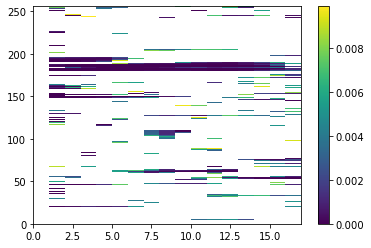

In [35]:
plt.pcolormesh(np.ma.masked_greater(file1['p_matrix'][3:,0,:],0.01))
plt.colorbar()
plt.show()

In [11]:
for inx,obj in enumerate(var_names[3:]):
    if obj=='outsst':
        print(inx)

174


20,46+1,148,174+1 (Single level var)

In [13]:
#PCSTABLE
TEST = np.ones((268,16))
for inx,obj in enumerate(file[1]):
    testobjindex1,testobjindex2 = obj[0]-3,obj[1]
    try:
        TEST[int(testobjindex1),np.abs(testobjindex2)-1] = 0
    except:
        continue

KeyError: 1

In [45]:
def make_storeP(tau_max0=None,results=None,target='v10'):
    if target=='precip':
        indexwant = 0
    elif target=='pmin':
        indexwant = 1
    elif target=='v10':
        indexwant = 2  
    storeP = []
    for i in range(tau_max0):
        storeP.append(results['p_matrix'][3:,0:3,i+1][:,int(indexwant)]) # Inputs / Targets / Lag
    return storeP

def process_forplot(inputt=None,threshold=None):#pc_alpha):
    testfilt = np.zeros_like(inputt)
    for i,j in zip(np.where(inputt>threshold)[0],np.where(inputt>threshold)[1]):
        testfilt[i,j] = 1
    return testfilt

In [46]:
#function to plot multivar pcmci
def plot_2d_plinks_multivar(array=None,figsizes=None,colors=['teal','white'],\
                          cticklabels=[r'p$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],choosetick=None,choosename=None,
                            hlineloc = None,alpha=0.3,startout=96+1,
                         title='RH: 10wspd',saveloc='/home/saranya/Downloads/plots_output/divshear_10wspdp.png',
                           alphas=[0.1,0.01]):
    import matplotlib
    matplotlib.rcParams['font.sans-serif'] = "DIN Alternate"
    matplotlib.rcParams['font.family'] = "sans-serif"
    
    fig,axs = plt.subplots(1,2,figsize=figsizes)
    axs[0].pcolormesh(array.transpose(),cmap=matplotlib.colors.ListedColormap(colors),alpha=alpha,edgecolors='gray',
                   linewidths=0.5)
    for obj in hlineloc:
        axs[0].axhline(y=obj,color='k',lw=2,alpha=0.9)
    #cb = plt.colorbar()
    #cb.set_ticks([0.25,0.75])
    #cb.set_ticklabels([r'p$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'])
    #for t in cb.ax.get_yticklabels():
    #    t.set_fontsize(10)
    #    t.set_weight('bold')
    
    #choosenames = var_names[3:][0:5+1]+var_names[3:][16:19+1]
    axs[0].set_yticks(choosetick, choosename, rotation=0,weight = 'normal',\
              fontsize=10.5)
    axs[0].set_xticks(np.linspace(0,16,9),[int(obj) for obj in (np.linspace(0,16,9)*3)],weight = 'normal',\
              fontsize=10.9)
    axs[0].set_title(f'pc_alpha={str(alphas[0])}',weight = 'normal',fontsize=12,loc='left')
    axs[0].set_title('TC Inner Region',weight = 'normal',fontsize=12,loc='right')
    axs[0].set_xlabel('Time Lag [Hours]',weight = 'normal',fontsize=12)
    axs[0].set_ylim(startout,0)
    axs[0].set_xlim(16,0)
    
    axs[1].pcolormesh((array.transpose())[startout:,:],
                      cmap=matplotlib.colors.ListedColormap(colors),alpha=alpha,edgecolors='gray',linewidths=0.5)
    smallhlineloc,smallyticksloc = [obj-startout for obj in hlineloc[6:]],[obj-startout for obj in choosetick[6:]]
    for obj in smallhlineloc:
        axs[1].axhline(y=obj,color='k',lw=2,alpha=0.9)
    axs[1].set_title(f'alpha_level={str(alphas[1])}',weight = 'normal',fontsize=12,loc='left')
    axs[1].set_title('TC Outer Region',weight = 'normal',fontsize=12,loc='right')
    axs[1].set_xlabel('Time Lag [Hours]',weight = 'normal',fontsize=12)
    axs[1].set_yticks(smallyticksloc)
    axs[1].set_yticklabels([])
    axs[1].set_xticks(np.linspace(0,16,9),[int(obj) for obj in (np.linspace(0,16,9)*3)],weight = 'normal',\
              fontsize=10.9)
    plt.suptitle(title,weight = 'bold',fontsize=12,horizontalalignment='center')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(saveloc,dpi=400,facecolor='w')
    plt.show()
    return None

In [47]:
#function to plot singlevars pcstable
def plot_2d_plinks_singlevar_pcstable(arrayin=None,arrayout=None,figsizes=None,colors=['teal','white'],\
                          cticklabels=[r'p$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],choosetick=None,choosename=None,alpha=0.3,
                         title='RH: 10wspd',saveloc='/home/saranya/Downloads/plots_output/divshear_10wspdp.png',
                           alphas=[0.1,0.01]):
    import matplotlib
    matplotlib.rcParams['font.sans-serif'] = "DIN Alternate"
    matplotlib.rcParams['font.family'] = "sans-serif"
    
    fig,axs = plt.subplots(1,2,figsize=figsizes)
    axs[0].pcolormesh(arrayin,cmap=matplotlib.colors.ListedColormap(colors),alpha=alpha,edgecolors='gray',
                   linewidths=0.5)
    #choosenames = var_names[3:][0:5+1]+var_names[3:][16:19+1]
    axs[0].set_yticks(choosetick, choosename, rotation=0,weight = 'normal',\
              fontsize=10.5)
    axs[0].set_xticks(np.linspace(0,16,9),[int(obj) for obj in (np.linspace(0,16,9)*3)],weight = 'normal',\
              fontsize=10.9)
    axs[0].set_title(f'pc_alpha={str(alphas[0])}',weight = 'normal',fontsize=12,loc='left')
    axs[0].set_title('TC Inner Region',weight = 'normal',fontsize=12,loc='right')
    axs[0].set_xlabel('Time Lag [Hours]',weight = 'normal',fontsize=12)
    #axs[0].set_ylim(startout,0)
    axs[0].set_xlim(16,0)
    
    axs[1].pcolormesh(arrayout,
                      cmap=matplotlib.colors.ListedColormap(colors),alpha=alpha,edgecolors='gray',linewidths=0.5)
    #axs[1].set_title(f'alpha_level={str1(alphas[1])}',weight = 'normal',fontsize=12,loc='left')
    axs[1].set_title('TC Outer Region',weight = 'normal',fontsize=12,loc='right')
    axs[1].set_xlabel('Time Lag [Hours]',weight = 'normal',fontsize=12)
    #axs[1].set_yticks(smallyticksloc)
    axs[1].set_yticklabels([])
    axs[1].set_xticks(np.linspace(0,16,9),[int(obj) for obj in (np.linspace(0,16,9)*3)],weight = 'normal',\
              fontsize=10.9)
    plt.suptitle(title,weight = 'bold',fontsize=12,horizontalalignment='center')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.tight_layout()
    #plt.savefig(saveloc,dpi=400,facecolor='w')
    plt.show()
    return None

In [60]:
TEST[20:46+1][0,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

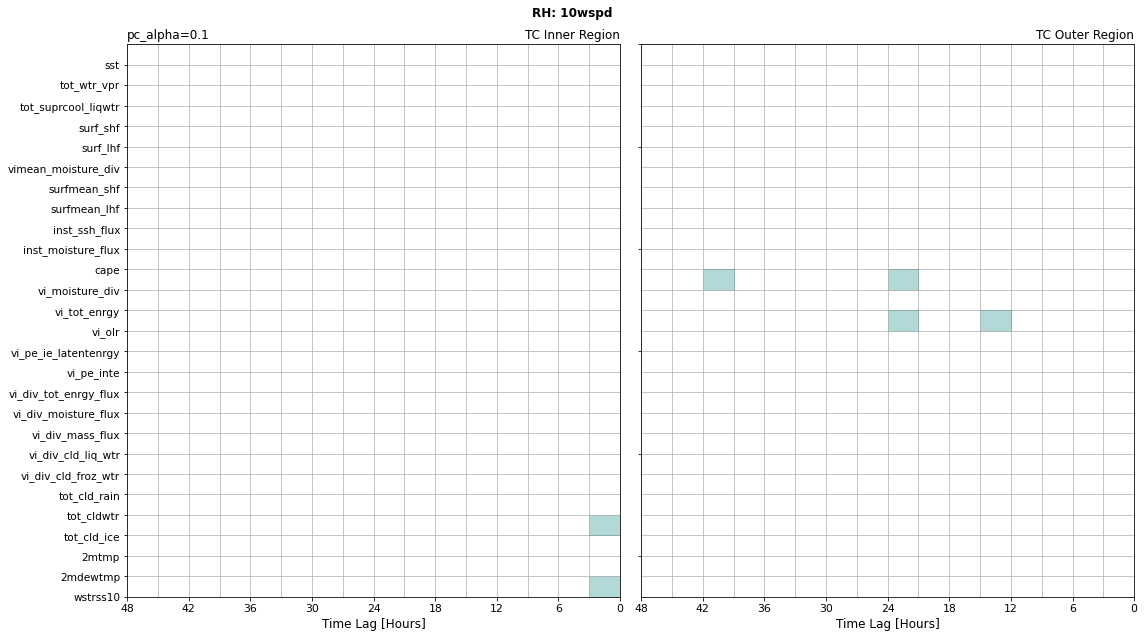

In [71]:
#plotting pcstable singlevars
plot_2d_plinks_singlevar_pcstable(arrayin=TEST[20:46+1],arrayout=TEST[148:174+1],figsizes=(16,9),colors=['teal','white'],\
                          cticklabels=[r'p$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],choosetick=np.linspace(0,26,27),choosename=var_names[3:][20:46+1],alpha=0.3,
                         title='RH: 10wspd',saveloc='/home/saranya/Downloads/plots_output/divshear_aaaaaa.png',
                           alphas=[0.1,0.01])

In [48]:
#preprocess data before plotting multivar pcmci
tau_max0=16
criteria=0.05
processed_rh_p = process_forplot(np.concatenate((np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,0:16],
                                 np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,47:144],
                                np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,175:]),axis=1),
                                 criteria)
np.count_nonzero(processed_rh_p==0)

568

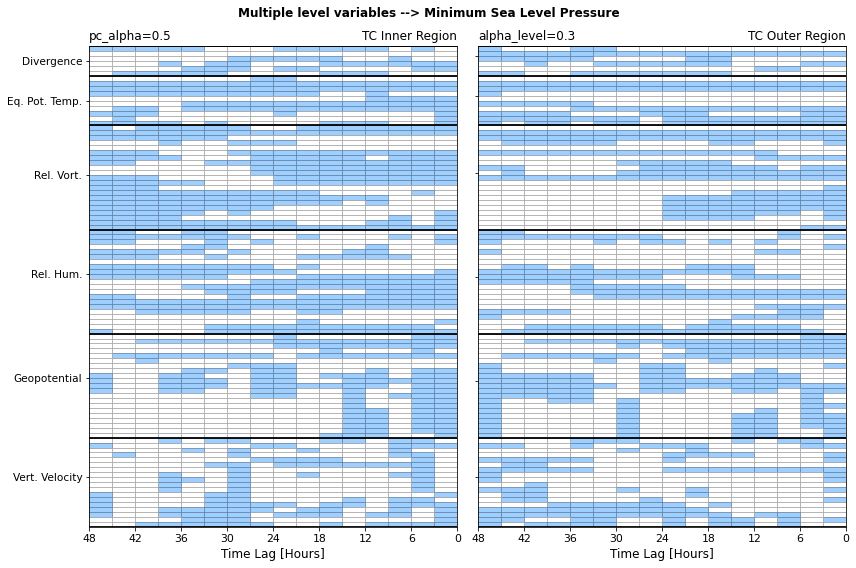

In [54]:
# plotting multivar pcmci
tau_max0=16
criteria=0.3
processed_rh_p = process_forplot(np.concatenate((np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,0:16],
                                 np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,47:144],
                                np.asarray(make_storeP(tau_max0,file1,target='pmin'))[0:17,175:]),axis=1),
                                 criteria)
plot_2d_plinks_multivar(array=processed_rh_p,figsizes=(12,8),colors=['dodgerblue','white'],\
                          cticklabels=[r'pc$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],\
                   choosetick = [3,11,26,46,67,87,99,107,122.5,143.5,164.5,184],
                      choosename=['Divergence','Eq. Pot. Temp.','Rel. Vort.',\
                                 'Rel. Hum.','Geopotential','Vert. Velocity',\
                                 'Divergence (Out)','Eq. Pot. Temp. (Out)','Rel. Vort. (Out)',\
                                  'Rel. Hum. (Out)','Geopotential (Out)','Vert. Velocity (Out)'],
                   hlineloc=[0,5+1,15+1,36+1,57+1,78+1,96+1,102+1,112+1,133+1,154+1,175+1,193+1],alpha=0.43,
                         title=f'Multiple level variables --> Minimum Sea Level Pressure',
                        saveloc='/home/saranya/Downloads/plots_output/tedtgdgdgdgd_0.3.png',alphas=[0.5,0.3])

In [ ]:
tau_max0=16
processed_rh_p = process_forplot(np.concatenate((np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,0:16],
                                 np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,47:144],
                                np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,175:]),axis=1),
                                 pc_alpha)
plot_2d_plinks_multivar(array=processed_rh_p,figsizes=(12,8),colors=['dodgerblue','white'],\
                          cticklabels=[r'pc$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],\
                   choosetick = [3,11,26,46,67,87,99,107,122.5,143.5,164.5,184],
                      choosename=['Divergence','Eq. Pot. Temp.','Rel. Vort.',\
                                 'Rel. Hum.','Geopotential','Vert. Velocity',\
                                 'Divergence (Out)','Eq. Pot. Temp. (Out)','Rel. Vort. (Out)',\
                                  'Rel. Hum. (Out)','Geopotential (Out)','Vert. Velocity (Out)'],
                   hlineloc=[0,5+1,15+1,36+1,57+1,78+1,96+1,102+1,112+1,133+1,154+1,175+1,193+1],alpha=0.43,
                         title=f'Multiple level variables: Minimum Sea Level Pressure',
                        saveloc='/home/saranya/Downloads/plots_output/tedtgdgdgdgd.png',alphas=[0.5,0.01])

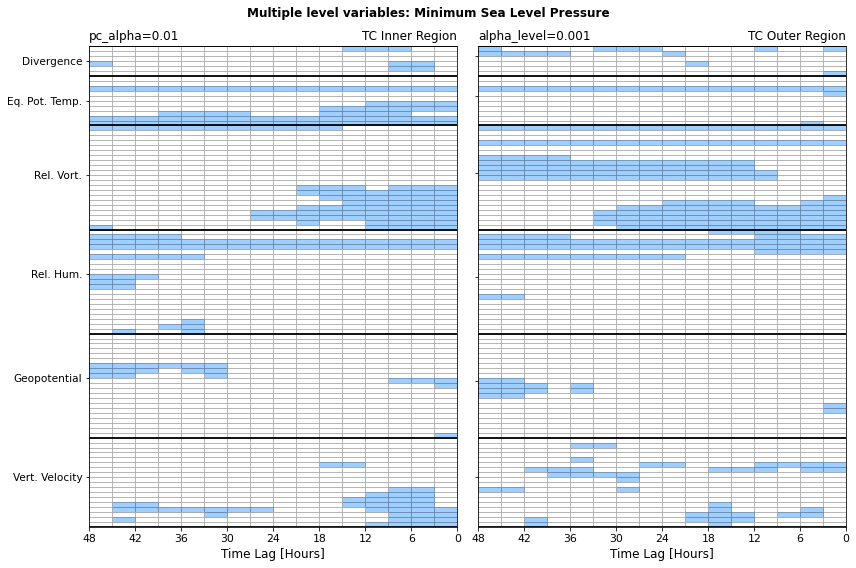

In [49]:
tau_max0=16
processed_rh_p = process_forplot(np.concatenate((np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,0:16],
                                 np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,47:144],
                                np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,175:]),axis=1),
                                 pc_alpha)
plot_2d_plinks_multivar(array=processed_rh_p,figsizes=(12,8),colors=['dodgerblue','white'],\
                          cticklabels=[r'pc$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],\
                   choosetick = [3,11,26,46,67,87,99,107,122.5,143.5,164.5,184],
                      choosename=['Divergence','Eq. Pot. Temp.','Rel. Vort.',\
                                 'Rel. Hum.','Geopotential','Vert. Velocity',\
                                 'Divergence (Out)','Eq. Pot. Temp. (Out)','Rel. Vort. (Out)',\
                                  'Rel. Hum. (Out)','Geopotential (Out)','Vert. Velocity (Out)'],
                   hlineloc=[0,5+1,15+1,36+1,57+1,78+1,96+1,102+1,112+1,133+1,154+1,175+1,193+1],alpha=0.43,
                         title=f'Multiple level variables: Minimum Sea Level Pressure',
                        saveloc='/home/saranya/Downloads/plots_output/multivar_pminpall.png',alphas=[0.01,0.001])

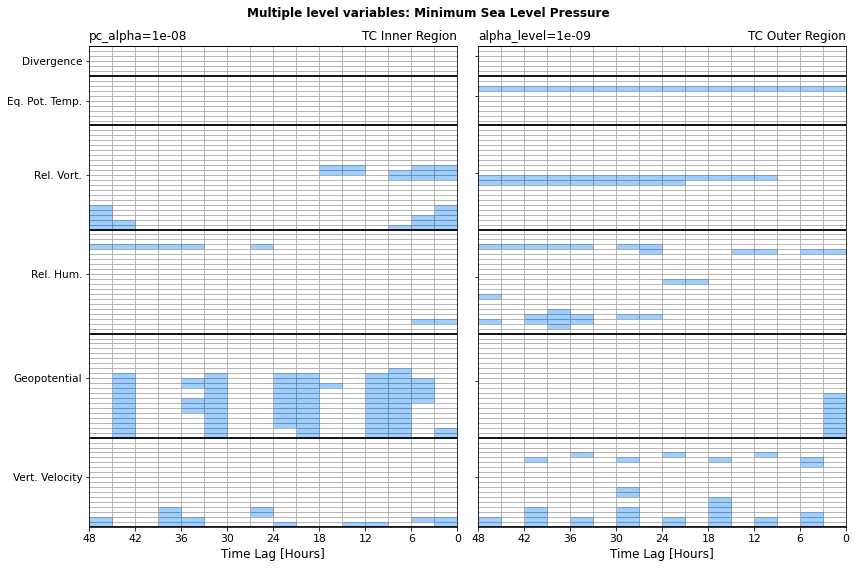

In [29]:
tau_max0=16
processed_rh_p = process_forplot(np.concatenate((np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,0:16],
                                 np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,47:144],
                                np.asarray(make_storeP(tau_max0,result,target='pmin'))[0:17,175:]),axis=1),
                                 pc_alpha)
plot_2d_plinks_multivar(array=processed_rh_p,figsizes=(12,8),colors=['dodgerblue','white'],\
                          cticklabels=[r'p$_{\alpha}$<0.05',r'p$_{\alpha}$>0.05'],\
                   choosetick = [3,11,26,46,67,87,99,107,122.5,143.5,164.5,184],
                      choosename=['Divergence','Eq. Pot. Temp.','Rel. Vort.',\
                                 'Rel. Hum.','Geopotential','Vert. Velocity',\
                                 'Divergence (Out)','Eq. Pot. Temp. (Out)','Rel. Vort. (Out)',\
                                  'Rel. Hum. (Out)','Geopotential (Out)','Vert. Velocity (Out)'],
                   hlineloc=[0,5+1,15+1,36+1,57+1,78+1,96+1,102+1,112+1,133+1,154+1,175+1,193+1],alpha=0.43,
                         title=f'Multiple level variables: Minimum Sea Level Pressure',
                        saveloc='/home/saranya/Downloads/plots_output/multivar_pminpall_optimal.png',alphas=[1e-8,1e-9])